In [182]:
from pandas import read_csv
import numpy as np
import seaborn as sns
from seaborn import regplot
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [114]:
df=read_csv("kc_house_data.csv")


In [115]:
print(df.shape)

(21613, 21)


In [116]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [117]:
df=df.drop(['id'],axis=1)

##

In [118]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [119]:
df2=df['floors'].value_counts().to_frame()



In [120]:
print(df2)

     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8


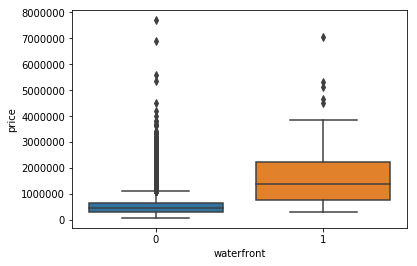

In [129]:
sns.boxplot(df['waterfront'],df['price'])

C:\Users\public\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


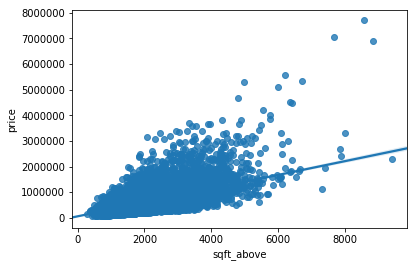

In [133]:
sns.regplot(x="sqft_above",y="price",data=df)

In [154]:
X=df[['sqft_living']]
Y=df[['price']]
lr=LinearRegression()
lr.fit(X,Y)
lr.score(X,Y)

0.49285321790379316

In [155]:

lr


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

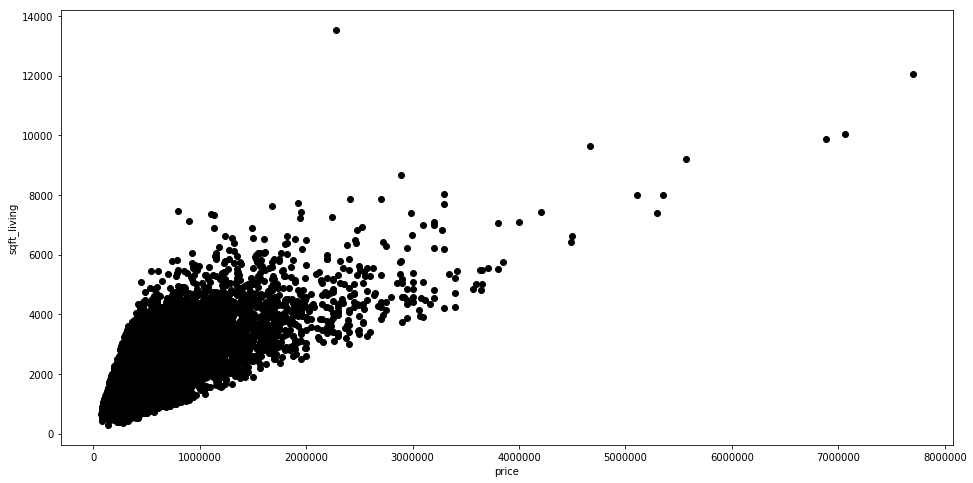

In [169]:
plt.figure(figsize=(16,8))
plt.scatter(data['price'],data['sqft_living'],c='black')
plt.xlabel("price")
plt.ylabel("sqft_living")
plt.show()

In [163]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Y=df[['price']]

In [164]:
lr.fit(X,Y)
lr.score(X,Y)

0.657715105827933

In [166]:
import statsmodels.api as sm

In [168]:
X2 =sm.add_constant(X)
e=sm.OLS(Y,X2)
e2=e.fit()
print(e2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     4151.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        19:24:45   Log-Likelihood:            -2.9602e+05
No. Observations:               21613   AIC:                         5.921e+05
Df Residuals:                   21602   BIC:                         5.921e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.239e+07   5.12e+05    -63.272

In [185]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [186]:
pipe=Pipeline(Input)
pipe.fit(X,Y)
pipe.score(X,Y)

0.7513468480488626

In [204]:
Rig = Ridge(alpha=0.1)
x_train=df[['floors','waterfront']]
x_test=df[['bedrooms','sqft_basement']]
y_train=df[['grade','sqft_above']]
y_test=df[['price','sqft_living']]

In [205]:
Rig.fit(x_train,y_train)
Rig.score(x_test,y_test)

-2.842872156469945

In [207]:
yhat = Rig.predict(x_test)

In [208]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [[9.14564266e+00 2.99046500e+03]
 [3.99960911e+02 2.31387984e+05]
 [8.15198722e+00 2.18925108e+03]
 [8.99244033e+02 5.23396036e+05]]
test set : [[221900.   1180.]
 [538000.   2570.]
 [180000.    770.]
 [604000.   1960.]]


In [209]:
pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.fit_transform(x_test)
rig = Ridge(alpha=0.1)
rig.fit(x_train_pf,y_train)
rig.score(x_test_pf,y_test)

-26255.41018223731